In [1]:
import glob
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [2]:
stock_data = pd.read_csv("stock_comment_count/AMC.csv")

In [3]:
#Fit model + Shift
stock_data['Volume'] = stock_data['Volume'].shift(1)
stock_data['volume_change'] = stock_data['volume_change'].shift(1)
stock_data['stock_change'] = stock_data['stock_change'].shift(1)
stock_data['comment_volume'] = stock_data['comment_volume'].shift(1)
stock_data['polarity_avg'] = stock_data['polarity_avg'].shift(1)
stock_data['subjectivity_avg'] = stock_data['subjectivity_avg'].shift(1)
stock_data = stock_data.dropna()


In [4]:
X = stock_data[["Volume", "volume_change", "stock_change", "comment_volume", "polarity_avg", "subjectivity_avg"]]
y = stock_data["Close"].values.reshape(-1, 1)

In [5]:
#X_train_st = X[:int(X.shape[0]*0.7)]
#X_test_st = X[int(X.shape[0]*0.7):]
#y_train_st = y[:int(X.shape[0]*0.7)]
#y_test_st = y[int(X.shape[0]*0.7):]

8.836363636363636


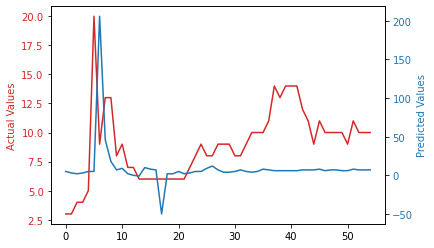

In [6]:
model = LinearRegression()
predicted = []
actual = []
for i in range(10,65):
    X_train = X.iloc[:i]
    y_train = y[:i]

    model.fit(X_train, y_train)
    
    pred = model.predict([X.iloc[i]])
    
    #compare pred to y i
    
    predicted.append(round(float(str(pred).replace("[", "").replace("]", ""))))
    actual.append(round(float(str(y[i]).replace("[", "").replace("]", ""))))
    
    
columns = ["Predicted", "Actual"]
#Add all lists scraped to dataframe
pred_vs_actual = pd.DataFrame(list(zip(predicted, actual)), columns = columns)
pred_vs_actual["Error"] = ''

for x in range(len(pred_vs_actual)):
    pred_vs_actual["Error"].iat[x] = abs(pred_vs_actual["Predicted"].iat[x] -  pred_vs_actual["Actual"].iat[x])
    
avg_error = pred_vs_actual["Error"].mean()

print(avg_error)


# Create some mock data
predicted_values = pred_vs_actual['Predicted']
actual_values = pred_vs_actual['Actual']

fig, ax1 = plt.subplots()

color = 'tab:red'
#ax1.set_xlabel('time (s)')
ax1.set_ylabel("Actual Values", color=color)
ax1.plot(actual_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Predicted Values', color=color)  # we already handled the x-label with ax1
ax2.plot(predicted_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

  # otherwise the right y-label is slightly clipped
plt.show()

In [7]:
#model = LinearRegression()
#model = RandomForestClassifier()
model = tree.DecisionTreeRegressor()


In [8]:
#try radnom forest
#try gradiet boosted trees

#make df with predictions and values
#Caluclate difference

predicted = []
actual = []
for i in range(10,65):
    X_train = X.iloc[:i]
    y_train = y[:i]

    model.fit(X_train, y_train)
    
    pred = model.predict([X.iloc[i]])
    
    #compare pred to y i
    
    predicted.append(round(float(str(pred).replace("[", "").replace("]", ""))))
    actual.append(round(float(str(y[i]).replace("[", "").replace("]", ""))))
    
    
columns = ["Predicted", "Actual"]
#Add all lists scraped to dataframe
pred_vs_actual = pd.DataFrame(list(zip(predicted, actual)), columns = columns)
pred_vs_actual["Error"] = ''


   
    


In [9]:
for x in range(len(pred_vs_actual)):
    pred_vs_actual["Error"].iat[x] = abs(pred_vs_actual["Predicted"].iat[x] -  pred_vs_actual["Actual"].iat[x])
    
avg_error = pred_vs_actual["Error"].mean()

print(avg_error)


3.7454545454545456


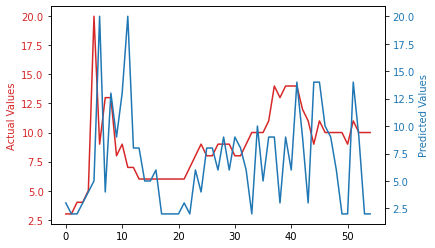

In [10]:
# Create some mock data
predicted_values = pred_vs_actual['Predicted']
actual_values = pred_vs_actual['Actual']

fig, ax1 = plt.subplots()

color = 'tab:red'
#ax1.set_xlabel('time (s)')
ax1.set_ylabel("Actual Values", color=color)
ax1.plot(actual_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Predicted Values', color=color)  # we already handled the x-label with ax1
ax2.plot(predicted_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

  # otherwise the right y-label is slightly clipped
plt.show()